In [1]:
import numpy as np
import matplotlib.pyplot as plt
from affinewarp.utils import modf
%matplotlib inline

In [2]:
def get_matrices(wfuncs):
    T = len(wfuncs[0])
    trng = np.arange(T)
    W = np.zeros((len(wfuncs), T, T))
    for k, wf in enumerate(wfuncs):
        lam, i = modf(wf * (T-1))
        W[k][trng, i] = 1-lam
        W[k][trng, (i+1) % T] += lam
    return W

In [171]:
T = 100
t = np.linspace(0, 1, T)

def rand_wfunc(knots=5, f=.5, g=.1):
    # random warp
    x = np.hstack((0, np.sort(np.random.rand(knots)), 1))
    y = np.hstack((0, np.sort(np.random.rand(knots)), 1))
    y = f*y + (1-f)*x

    y0 = np.random.uniform(-g, g)
    y1 = np.random.uniform(1-g, 1+g)
    y = (y1-y0)*y + y0
    
#     plt.figure(figsize=(3,2))
    plt.plot(x, y, '-k', alpha=.5)
    plt.plot(x, y, '.', ms=10)
    plt.axhline(0, dashes=[2,2], color='k')
    plt.axvline(0, dashes=[2,2], color='k')
    plt.axhline(1, dashes=[2,2], color='k')
    plt.axvline(1, dashes=[2,2], color='k')
#     plt.show()

    return np.clip(np.interp(t, x, y), 0, 1)

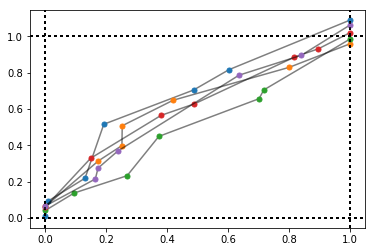

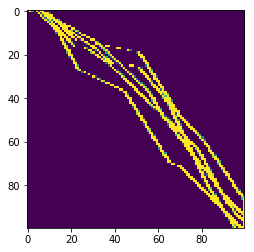

In [172]:
W = get_matrices([rand_wfunc() for _ in range(5)])
plt.show()
plt.imshow(W.mean(0), clim=(0,.05))

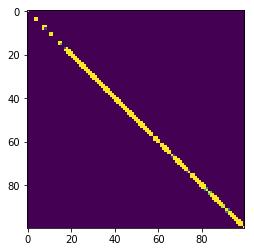

In [139]:
plt.imshow(np.dot(W[0].T, W[0]), clim=(0,.1))

In [150]:
(W[0]>0).sum(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [149]:
g = .1
np.exp(np.log(1+g))

1.1